# Exercise: Fitting a Polynomial Curve

In this exercise, we'll have a look at a different type of regression called _polynomial regression_.
In contrast to _linear regression_ ,which models relationships as straight lines, _polynomial regression_ models relationships as curves.

Recall in our previous exercise how the relationship between `core_temperature` and `protein_content_of_last_meal` couldn't be properly explained using a straight line. In this exercise, we'll use _polynomial regression_ to fit a curve to the data instead.

## Data visualization

Let's start this exercise by loading and having a look at our data.

In [1]:
import pandas
import statsmodels
#!pip install statsmodels
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv

#Import the data from the .csv file
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv"
dataset = pandas.read_csv(url, delimiter="\t")

#Let's have a look at the data
dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


# Simple Linear Regression

Let's quickly jog our memory by performing the same _simple linear regression_ as we did in the previous exercise, using the `temperature` and `protein_content_of_last_meal` columns of the dataset. 


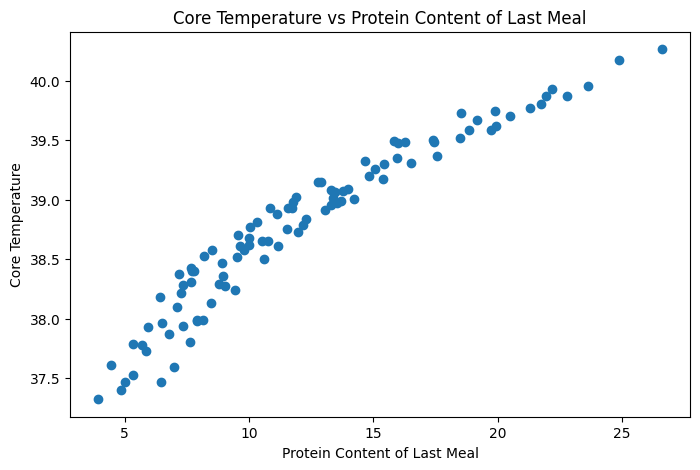

In [2]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
simple_formula = "core_temperature ~ protein_content_of_last_meal"
simple_model = smf.ols(formula = simple_formula, data = dataset).fit()

# Show a graph of the result
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"])
plt.title("Core Temperature vs Protein Content of Last Meal")
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.show()

Notice how the relationship between the two variables is not truly linear. Looking at the plot, it's fairly clear to see that the points tend more heavily towards one side of the line, especially for the higher `core-temperature` and `protein_content_of_last_meal` values. 

A straight line might not be the best way to describe this relationship.

Let's have a quick look at the model's R-Squared score:

In [3]:
print("R-squared:", simple_model.rsquared)

R-squared: 0.9155158150005704


That's quite a reasonable R-Squared score, but let's see if we can get an even better one!

## Simple Polynomial Regression

Let's fit a _simple polynomial regression_ this time. Similar to a _simple linear regression_, a _simple polynomial regression_ models the relationship between a label and a single feature. Unlike a _simple linear regression_, a _simple polynomial regression_ can explain relationships that aren't simply straight lines.

In our example, we're going to use a three-parameter polynomial.

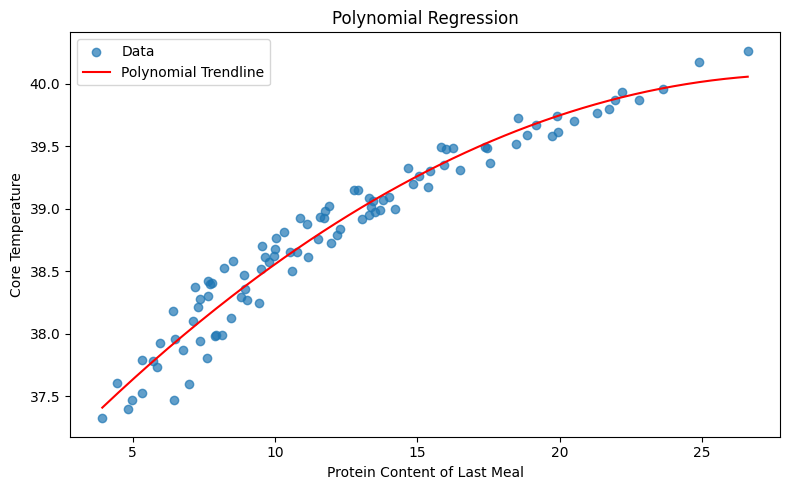

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # ✅ Import the formula API

# Perform polynomial regression
polynomial_formula = "core_temperature ~ protein_content_of_last_meal + I(protein_content_of_last_meal**2)"
polynomial_model = smf.ols(formula=polynomial_formula, data=dataset).fit()

# Scatter plot of the data
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"], dataset["core_temperature"], label="Data", alpha=0.7)

# Generate smooth x values for the trendline
x_vals = np.linspace(dataset["protein_content_of_last_meal"].min(), dataset["protein_content_of_last_meal"].max(), 200)
x_df = pd.DataFrame({"protein_content_of_last_meal": x_vals})

# Predict y values using the model
y_vals = polynomial_model.predict(x_df)

# Plot the trendline
plt.plot(x_vals, y_vals, color="red", label="Polynomial Trendline")

# Label axes and show plot
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.title("Polynomial Regression")
plt.legend()
plt.tight_layout()
plt.show()


That looks a lot better already. Let's confirm by having a quick look at the R-Squared score:

In [6]:
print("R-squared:", polynomial_model.rsquared)

R-squared: 0.9514426069911688


That's a better R-Squared score than the one obtained from the previous model! We can now confidently tell our vet to prioritize dogs who ate a high-protein diet the night before. 

Let's chart our model as a 3D chart. We'll view $X$ and $X^2$ as two separate parameters. Notice that our regression model is still a flat plane. This is why polynomial models are still considered to be `linear models`.

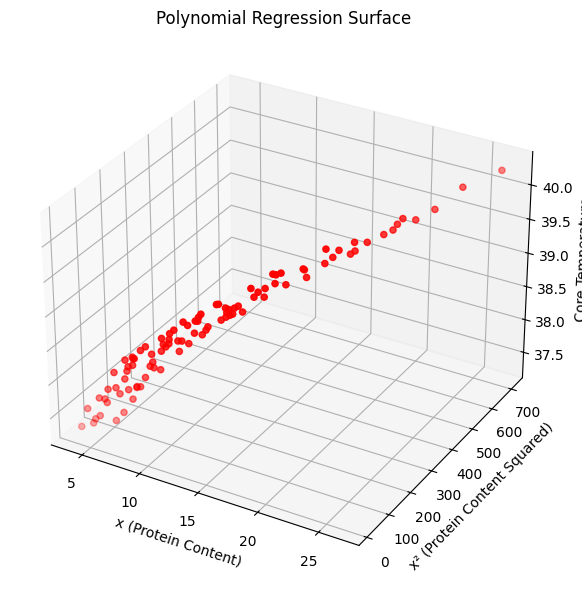

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of x values
x_vals = np.linspace(dataset.protein_content_of_last_meal.min(),
                     dataset.protein_content_of_last_meal.max(), 50)
x_grid, y_grid = np.meshgrid(x_vals, x_vals)

# Compute x² from the grid
x2_grid = x_grid**2

# Compute z using the polynomial model's parameters
z_grid = (polynomial_model.params["Intercept"]
          + polynomial_model.params["protein_content_of_last_meal"] * x_grid
          + polynomial_model.params["I(protein_content_of_last_meal ** 2)"] * x2_grid)

# Create the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_grid, x2_grid, z_grid, alpha=0.6, cmap="viridis", edgecolor="none")

# Add the original data points
ax.scatter(dataset.protein_content_of_last_meal,
           dataset.protein_content_of_last_meal**2,
           dataset.core_temperature,
           color="red")

# Axis labels and title
ax.set_xlabel("x (Protein Content)")
ax.set_ylabel("x² (Protein Content Squared)")
ax.set_zlabel("Core Temperature")
ax.set_title("Polynomial Regression Surface")

plt.tight_layout()
plt.show()


## Extrapolating

Let's see what happens if we extrapolate our data. We'd like to see if dogs that ate meals even higher in protein are expected to get even sicker.

Let's start with the _linear regression_. We can set what range we'd like to extrapolate our data over by using the `x_range` argument in the plotting function. Let's extrapolate over the range `[0,100]`:


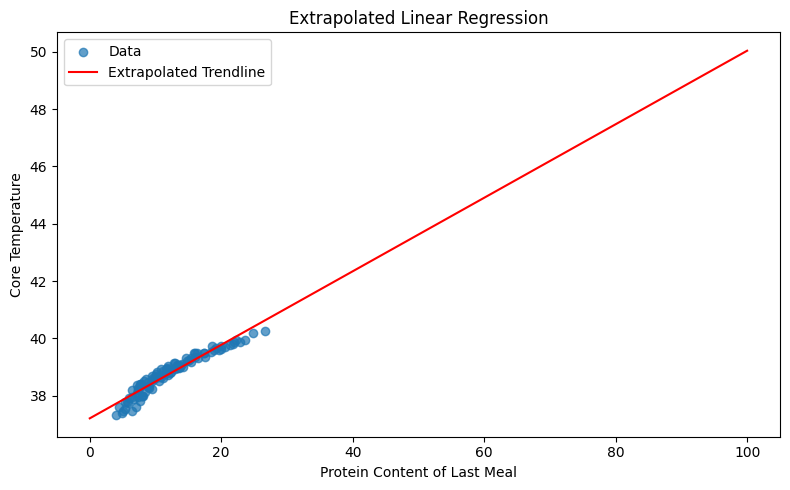

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the actual data
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"],
            dataset["core_temperature"],
            label="Data", alpha=0.7)

# Define extrapolation range
x_vals = np.linspace(0, 100, 200)

# Calculate the trendline using the simple linear model
y_vals = (simple_model.params["Intercept"] +
          simple_model.params["protein_content_of_last_meal"] * x_vals)

# Plot the extrapolated trendline
plt.plot(x_vals, y_vals, color="red", label="Extrapolated Trendline")

# Label axes and add title/legend
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.title("Extrapolated Linear Regression")
plt.legend()
plt.tight_layout()
plt.show()


Next, we extrapolate the _polynomial regression_ over the same range:

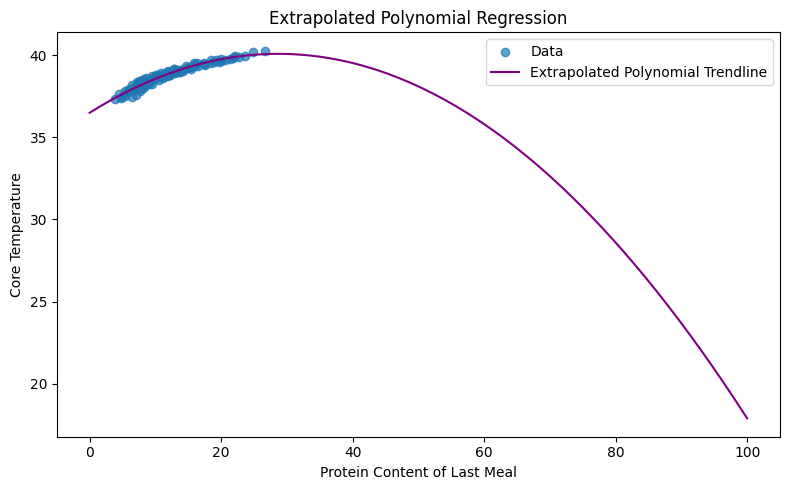

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the actual data
plt.figure(figsize=(8, 5))
plt.scatter(dataset["protein_content_of_last_meal"],
            dataset["core_temperature"],
            label="Data", alpha=0.7)

# Define extrapolation range
x_vals = np.linspace(0, 100, 300)

# Compute the polynomial trendline using named parameters
intercept = polynomial_model.params["Intercept"]
linear_coef = polynomial_model.params["protein_content_of_last_meal"]
quadratic_coef = polynomial_model.params["I(protein_content_of_last_meal ** 2)"]

y_vals = intercept + linear_coef * x_vals + quadratic_coef * x_vals**2

# Plot the extrapolated polynomial trendline
plt.plot(x_vals, y_vals, color="purple", label="Extrapolated Polynomial Trendline")

# Label axes and add title/legend
plt.xlabel("Protein Content of Last Meal")
plt.ylabel("Core Temperature")
plt.title("Extrapolated Polynomial Regression")
plt.legend()
plt.tight_layout()
plt.show()


These two graphs predict two very different things!

The extrapolated _polynolmial regression_ expects `core_temperature` to go down, while the extrapolated _linear regression_ expects linear expects `core_temperature` to go up.

A quick look at the graphs obtained in the previous exercise confirms that we should expect the `core_temeprature` to rise, not fall, as the `protein_content_of_last_meal` increases.

In general, it's not recommended to extrapolate from a _polynomial regression_ unless you have an a-priori reason to do so (which is only very rarely the case, so it's best to err on the side of caution and never extrapolate from  _polynomial regressions_).

## Summary

We covered the following concepts in this exercise:

- Built _simple linear regression_ and _simple polynomial regression_ models.
- Compared the performance of both models by plotting them and looking at R-Squared values.
- Extrapolated the models over a wider range of values.